# Esempio di interpolazione e filtraggio - Notebook 2.1

Import delle librerie necessarie per la simulazione

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from scipy.interpolate import interpn
from scipy.spatial.distance import euclidean
from scipy.ndimage import zoom
import pydicom
import os
import imageio
import napari

Import dei dati DICOM da cartella specifica e visualizzazione 3D del dataset tramite la libreria napari

In [2]:
# set directory
directory = '../data/Phantom_CT_PET/2-CT 2.5mm-5.464/'

# get all files in directory
files = sorted(os.listdir(directory))
print(files)
# get info from dicom
ds = pydicom.dcmread(directory + files[0])
print("Patient ID:", ds.PatientID)

# get size along 3 axis
xSize = ds.Rows
ySize = ds.Columns
zSize = len(files)
print(xSize, ySize, zSize)

# get resolution
dx = ds.PixelSpacing[0]
dy = ds.PixelSpacing[1]
loc1 = ds.ImagePositionPatient
ds2  = pydicom.dcmread(directory + files[1])
loc2 = ds2.ImagePositionPatient
dz = euclidean(loc1, loc2)
print(dx, dy, dz)

# import volume
vol = imageio.volread(directory, 'DICOM')
FOV = [dx*xSize,dy*ySize,dz*zSize]
print("FOV:", FOV)
print(vol.shape)

#use napari
viewer = napari.view_image(vol, name = "my volume", colormap = "gray")

#run the viewer
napari.run()

['000000.dcm', '000001.dcm', '000002.dcm', '000003.dcm', '000004.dcm', '000005.dcm', '000006.dcm', '000007.dcm', '000008.dcm', '000009.dcm', '000010.dcm', '000011.dcm', '000012.dcm', '000013.dcm', '000014.dcm', '000015.dcm', '000016.dcm', '000017.dcm', '000018.dcm', '000019.dcm', '000020.dcm', '000021.dcm', '000022.dcm', '000023.dcm', '000024.dcm', '000025.dcm', '000026.dcm', '000027.dcm', '000028.dcm', '000029.dcm', '000030.dcm', '000031.dcm', '000032.dcm', '000033.dcm', '000034.dcm', '000035.dcm', '000036.dcm', '000037.dcm', '000038.dcm', '000039.dcm', '000040.dcm', '000041.dcm', '000042.dcm', '000043.dcm', '000044.dcm', '000045.dcm', '000046.dcm', '000047.dcm', '000048.dcm', '000049.dcm', '000050.dcm', '000051.dcm', '000052.dcm', '000053.dcm', '000054.dcm', '000055.dcm', '000056.dcm', '000057.dcm', '000058.dcm', '000059.dcm', '000060.dcm', '000061.dcm', '000062.dcm']
Patient ID: SNMCB04
512 512 63
0.683594 0.683594 2.5
Reading DICOM (examining files): 1/63 files (1.6%63/63 files (10

/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7308/4292856684.py:33: FutureWarning: `napari.view_image` is deprecated and will be removed in napari 0.7.0.
Use `viewer = napari.Viewer(); viewer.add_image(...)` instead.
  viewer = napari.view_image(vol, name = "my volume", colormap = "gray")


In [3]:
#interpolation
# original coordinates
x = np.arange(0,xSize*dx,dx)
y = np.arange(0,ySize*dy,dy)
z = np.arange(0,zSize*dz,dz)
print(x.shape)
print(z.shape)
# new coordinates
new_x = np.arange(0,xSize*dx,dx)
new_y = np.arange(0,ySize*dy,dy)
new_z = np.arange(0,(zSize-1)*dz,dx)
print(dx)
print(dz)
print(new_z.shape)
# mesh of new coordinates
new_coords = np.meshgrid(new_z,new_x, new_y, indexing = 'ij');
volumeInt = interpn((z,x,y), vol, np.stack(new_coords,axis=-1))

# use napari
viewer = napari.view_image(volumeInt, name = "my volume interpolated", colormap = "gray")

# run the viewer
#napari.run()
print(vol.shape)
print(volumeInt.shape)

(512,)
(63,)
0.683594
2.5
(227,)


/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_7308/2702424435.py:20: FutureWarning: `napari.view_image` is deprecated and will be removed in napari 0.7.0.
Use `viewer = napari.Viewer(); viewer.add_image(...)` instead.
  viewer = napari.view_image(volumeInt, name = "my volume interpolated", colormap = "gray")


(63, 512, 512)
(227, 512, 512)


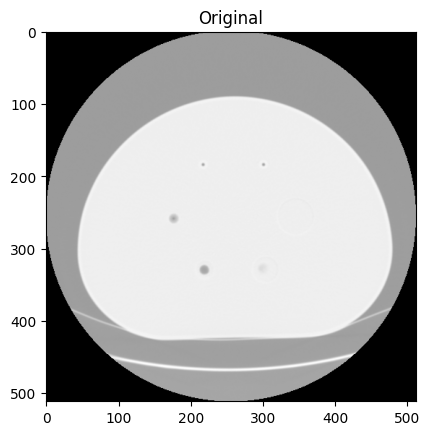

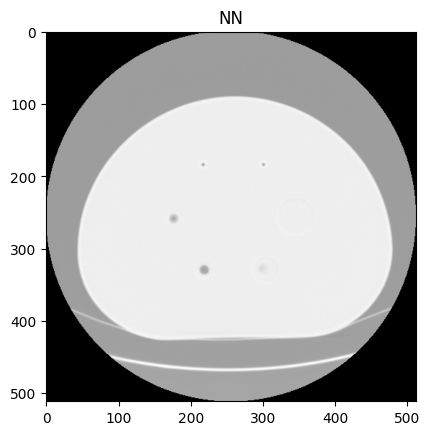

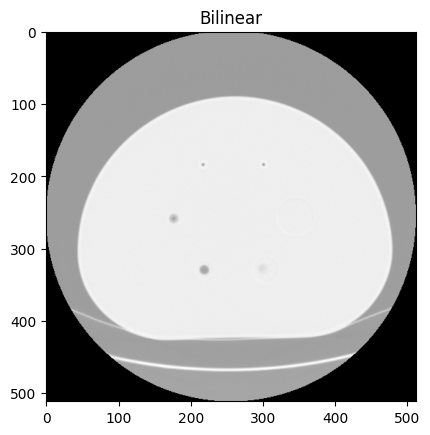

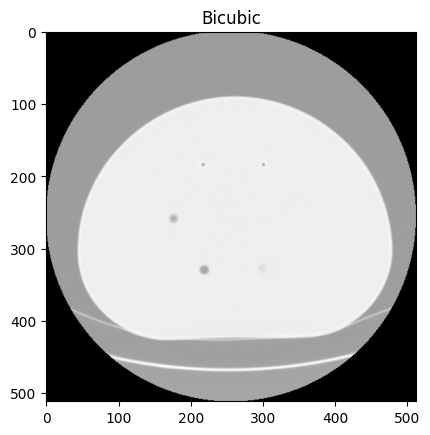

(1024, 1024)


2026-01-16 11:44:13.508 Python[7308:346308] +[IMKClient subclass]: chose IMKClient_Modern
2026-01-16 11:44:13.508 Python[7308:346308] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
# plane interpolation
img = vol[33,:,:]

# original image
fig, ax = plt.subplots()
ax.imshow(img, cmap = "gray")
ax.set_title("Original")
plt.show()

# set scaling factor
scaling_factors = (2, 2)

# nearest neighbor
resized_image = ndi.zoom(img, zoom = scaling_factors, order = 0)
fig, ax = plt.subplots()
ax.imshow(img, cmap = "gray")
ax.set_title("NN")
plt.show()

# bilinear
resized_image = ndi.zoom(img, zoom = scaling_factors, order = 1)
fig, ax = plt.subplots()
ax.imshow(img, cmap = "gray")
ax.set_title("Bilinear")
plt.show()

# bicubic
resized_image = ndi.zoom(img, zoom = scaling_factors, order = 3)
fig, ax = plt.subplots()
ax.imshow(img, cmap = "gray")
ax.set_title("Bicubic")
plt.show()
print(resized_image.shape)
